In [42]:
%matplotlib inline
import pandas as pd
import pandas_profiling as pp
import numpy as np # linear algebra
import plotly.express as px
import plotly.graph_objects as go
from sklearn.preprocessing import MultiLabelBinarizer 
import seaborn as sns
import tkinter
import matplotlib
import matplotlib.colors
import matplotlib.pyplot as plt
data = pd.read_csv('final_dataset.csv')
# pp.ProfileReport(data, minimal=True)

In [43]:
data['count'] = 1
data['first_country'] = data['country'].apply(lambda x: x.split(",")[0])
data['first_country'].replace('United States', 'USA', inplace=True)
data['first_country'].replace('United Kingdom', 'UK',inplace=True)
data['first_country'].replace('South Korea', 'S. Korea',inplace=True)

In [36]:
data.dtypes

type                     object
imdb_id                  object
title                    object
director                 object
director_gender          object
cast                     object
distributor              object
country                  object
languages                object
release_year            float64
rating                   object
duration                 object
listed_in                object
netflix                 float64
amazon                  float64
date_added_netflix       object
date_added_amazon        object
imDbRating               object
imDbRatingVotes          object
rottenTomatoes           object
budget                   object
gross                    object
description              object
keywords                 object
awards                   object
special_award_name       object
special_award_tot        object
special_award_stat       object
award_nomination_tot     object
award_win_tot            object
count                     int64
first_co

In [44]:
x= data.groupby(['type'])[['type']].count()
y=len(data)
r=((x/y)).round(2)

ratio = pd.DataFrame(r)
ratio

,type
type,
Movie,0.78
TV Show,0.22


In [45]:
fig = px.pie(ratio, values='type', names=ratio.index)
colors = ['gold', 'mediumturquoise', 'darkorange', 'lightgreen']
fig.update_traces(textposition='inside', textinfo='percent+label', textfont_color='#000000', textfont_size=20, marker=dict(colors=colors, line=dict(color='#000000', width=2)))
fig.update_layout(title_text='Movie & TV Show distribution<br><sup>We see vastly more movies than TV shows on Streaming Service.</sup>')
fig.show()

In [10]:
x= data.groupby(['type'])[['amazon', 'netflix']].sum()
y=len(data)
r=((x*100/y)).round(2)

ratio = pd.DataFrame(r)

In [11]:
df = pd.DataFrame()
df['val'] = [35.80, 5.85, 43.78, 16.37]
df['type'] = ['Movie', 'TV Show', 'Movie', 'TV Show']
df['distributer'] = ['Amazon', 'Amazon', 'Netflix', 'Netflix']

df

,val,type,distributer
0,35.80,Movie,Amazon
1,5.85,TV Show,Amazon
2,43.78,Movie,Netflix
3,16.37,TV Show,Netflix


In [12]:
fig = px.sunburst(df, path=['type', 'distributer'], values='val', color='val', hover_data=['val'], color_continuous_scale=colors)
fig.update_traces(marker=dict(line=dict(color='#000000', width=2)))
fig.update_layout(title_text='Movie & TV Show distribution<br><sup>We see vastly more movies than TV shows on Streaming Service.</sup>')
fig.show()

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/plotly/express/_core.py:1637: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/plotly/express/_core.py:1637: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



# Top 10 Cuntry

In [13]:
df = data.copy()
df['country'].replace('no_data', np.nan, inplace  = True)
df.dropna(inplace=True)
df = pd.DataFrame(df.groupby('first_country')['count'].sum().sort_values(ascending=False)[0:10])
df

,count
first_country,
USA,3240
India,1156
UK,619
Canada,279
France,168
S. Korea,146
Spain,125
Australia,124
Germany,92


In [14]:
fig = go.Figure(data=[go.Bar(x=df.index, y=df['count'].to_list(),
            hovertext=['total ammount', '24% market share', '19% market share'])])

fig.update_traces(marker_color=colors, textfont_color='#000000', textfont_size=20, marker_line=dict(color='#000000', width=2))
fig.update_layout(title_text='Top 10 countries on Streaming Service<br><sup>The four most frequent countries have been highlighted.</sup>')

# fig.update_text(0.09, 0.95, 'The three most frequent countries have been highlighted.', fontsize=12, fontweight='light', fontfamily='serif')
fig.show()

# Top 10 languages

In [15]:
df = data.copy()
df['languages'].replace('no_data', np.nan, inplace  = True)
df.dropna(inplace=True)
df['first_lang'] = df['languages'].apply(lambda x: x.split(",")[0])
df = pd.DataFrame(df.groupby('first_lang')['count'].sum().sort_values(ascending=False)[0:10])
df

,count
first_lang,
English,4636
Hindi,745
Spanish,256
Tamil,192
Korean,137
French,128
Mandarin,84
Arabic,74
Cantonese,69


In [16]:
df2 = data.copy()
df2['languages'].replace('no_data', np.nan, inplace  = True)
df2.dropna(inplace=True)
languages = []
for i, x in df2['languages'].iteritems():
    l = x.split(', ')
    for lang in l:
        languages.append(lang)
df = pd.DataFrame()
df['languages'] = languages
df['count'] = 1
df = pd.DataFrame(df.groupby('languages')['count'].sum().sort_values(ascending=False)[0:10])
df

,count
languages,
English,5264
Hindi,799
Spanish,574
French,519
German,272
Tamil,219
Mandarin,172
Arabic,171
Italian,165


In [17]:
fig = go.Figure(data=[go.Bar(x=df.index, y=df['count'].to_list(),
            hovertext=['total ammount', '24% market share', '19% market share'])])

fig.update_traces(marker_color=colors, textfont_color='#000000', textfont_size=20, marker_line=dict(color='#000000', width=2))
fig.update_layout(title_text='Top 10 languages on Streaming Service<br><sup>The four most frequent countries have been highlighted.</sup>')

# fig.update_text(0.09, 0.95, 'The three most frequent countries have been highlighted.', fontsize=12, fontweight='light', fontfamily='serif')
fig.show()

# Rating Distribution

In [18]:
data['rating']

0             Adults 18+
1             Adults 18+
2       Young Adults 16+
3              Teens 13+
4             Adults 18+
              ...       
8307            Kids All
8308    Young Adults 16+
8309          Adults 18+
8310          Adults 18+
8311          Adults 18+
Name: rating, Length: 8312, dtype: object

In [19]:
df = data.copy()
df['rating'].replace('no_data', np.nan, inplace  = True)
df.dropna(inplace=True)
order = pd.DataFrame(df.groupby('rating')['count'].sum().sort_values(ascending=False).reset_index())
rating_order = list(order['rating'])

order

,rating,count
0,Adults 18+,3654
1,Young Adults 16+,1724
2,Teens 13+,1408
3,Older Kids 7+,954
4,Kids All,450
5,Unrated,120


In [20]:
mf = df.groupby('type')['rating'].value_counts().unstack().sort_index().fillna(0).astype(int)[rating_order]
movie = mf.loc['Movie']
tv = - mf.loc['TV Show']
mf

rating,Adults 18+,Young Adults 16+,Teens 13+,Older Kids 7+,Kids All,Unrated
type,,,,,,
Movie,2895,1230,1344,645,266,102
TV Show,759,494,64,309,184,18


In [21]:
fig = go.Figure()
fig.add_trace(go.Bar(x=mf.columns, y= mf.loc['Movie'],
                base=0,
                marker_color='gold',
                name='Movie'))
fig.add_trace(go.Bar(x=mf.columns,  y= mf.loc['TV Show'],
                base=[-759, -494, -64, -309, -184, -18],
                marker_color='mediumturquoise',
                name='TV Shows'
                ))
fig.update_traces( textfont_color='#000000', textfont_size=20, marker_line=dict(color='#000000', width=2))
fig.update_layout(title_text='Rating distribution by Film & TV Show<br><sup>We observe that most movies are for adults, there is a lack of TV Shows for teens</sup>')


fig.show()

# Director Gender Distribution

In [22]:
df = data.copy()
df['director_gender'].replace('no_data', np.nan, inplace  = True)
df = df.dropna(subset=['director_gender'])
gender = []
type = []
for i, x in df['director_gender'].iteritems():
    x = x.split(', ')
    for gen in x:
        gender.append(gen)
        if df['type'][i] == 'TV Show':
            type.append('TV Show')
        if df['type'][i] == 'Movie':
            type.append('Movie')
df = pd.DataFrame()
df['type'] = type
df['gender'] = gender
df['count'] = 1
df


,type,gender,count
0,TV Show,male,1
1,Movie,male,1
2,TV Show,male,1
3,Movie,male,1
4,Movie,male,1
...,...,...,...
7118,Movie,male,1
7119,TV Show,male,1
7120,Movie,female,1
7121,Movie,male,1


In [23]:
order = pd.DataFrame(df.groupby('gender')['count'].sum().sort_values(ascending=False).reset_index())
gender_order = list(order['gender'])

fig = px.pie(order, values='count', names=order.index)
colors = ['gold', 'mediumturquoise', 'darkorange', 'lightgreen']
fig.update_traces(textposition='inside', textinfo='percent+label', textfont_color='#000000', textfont_size=20, marker=dict(colors=colors, line=dict(color='#000000', width=2)))
fig.update_layout(title_text='Movie & TV Show distribution<br><sup>We see vastly more movies than TV shows on Streaming Service.</sup>')
fig.show()

In [24]:
mf = df.groupby('type')['gender'].value_counts().unstack().sort_index().fillna(0).astype(int)[gender_order]
movie = mf.loc['Movie']
tv = - mf.loc['TV Show']
mft = pd.DataFrame(mf).T
mf

gender,male,female,unknown,andy,transgender female,non-binary
type,,,,,,
Movie,5524,794,239,26,4,1
TV Show,430,72,17,15,0,1


In [25]:
df_new = pd.DataFrame()
j = 0
for i, x in mft.iterrows():
    m = x['Movie']
    s = x['TV Show']
    df_new.loc[j, 'type'] = 'Movie'
    df_new.loc[j, 'count'] = m
    df_new.loc[j, 'gender'] = i
    j+=1
    df_new.loc[j, 'type'] = 'TV Show'
    df_new.loc[j, 'count'] = s
    df_new.loc[j, 'gender'] = i
    j+=1

df_new

,type,count,gender
0,Movie,5524.0,male
1,TV Show,430.0,male
2,Movie,794.0,female
3,TV Show,72.0,female
4,Movie,239.0,unknown
5,TV Show,17.0,unknown
6,Movie,26.0,andy
7,TV Show,15.0,andy
8,Movie,4.0,transgender female
9,TV Show,0.0,transgender female


In [26]:
fig = px.histogram(df_new, x="gender", y="count", color="gender", pattern_shape="type")
fig.show()

In [27]:
fig = go.Figure(go.Histogram(
    x=movie.values,
    bingroup=1))

fig.add_trace(go.Histogram(
    x=tv.values,
    bingroup=1))

fig.update_layout(
    barmode="overlay",
    bargap=0.1)

fig.show()

In [28]:
fig = go.Figure()
fig.add_trace(go.Bar(x=mf.columns, y= mf.loc['Movie'],
                base=0,
                marker_color='gold',
                name='Movie'))
fig.add_trace(go.Bar(x=mf.columns,  y= mf.loc['TV Show'],
                base=0,
                marker_color='mediumturquoise',
                name='TV Shows'
                ))
fig.show()

# Distribution Movie & TV Show over years

In [46]:
df = data.copy()
df['date_added_netflix'].replace('no_data', np.nan, inplace  = True)
df = df.dropna(subset=['date_added_netflix'])
df['date_added_netflix'] = pd.to_datetime(df['date_added_netflix'])
df['year_added_netflix'] = df['date_added_netflix'].dt.year


### netflix addition over year 

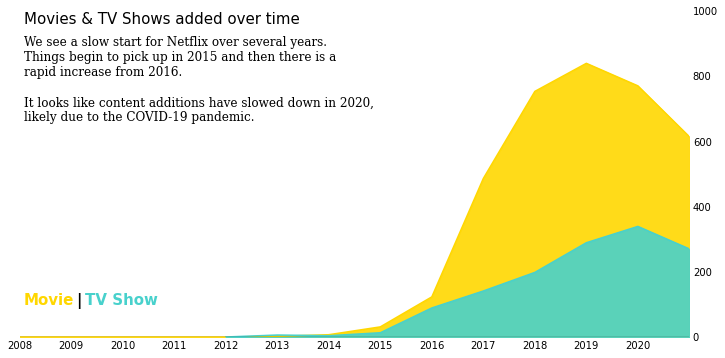

In [47]:

fig, ax = plt.subplots(1, 1, figsize=(12, 6))

for i, mtv in enumerate(df['type'].value_counts().index):
    mtv_rel = df[df['type']==mtv]['year_added_netflix'].value_counts().sort_index()
    ax.plot(mtv_rel.index, mtv_rel, color=colors[i], label=mtv)
    ax.fill_between(mtv_rel.index, 0, mtv_rel, color=colors[i], alpha=0.9)
    
ax.yaxis.tick_right()
    
ax.axhline(y = 0, color = 'black', linewidth = 1.3, alpha = .7)

ax.set_ylim(0, 1000)
#ax.legend(loc='upper left')
for s in ['top', 'right','bottom','left']:
    ax.spines[s].set_visible(False)

ax.grid(False)

ax.set_xlim(2008,2021)
plt.xticks(np.arange(2008, 2021, 1))

fig.text(0.13, 0.85, 'Movies & TV Shows added over time', fontsize=15)
fig.text(0.13, 0.59, 
'''We see a slow start for Netflix over several years. 
Things begin to pick up in 2015 and then there is a 
rapid increase from 2016.

It looks like content additions have slowed down in 2020, 
likely due to the COVID-19 pandemic.
'''

, fontsize=12, fontweight='light', fontfamily='serif')


fig.text(0.13,0.2,"Movie", fontweight="bold",  fontsize=15, color='gold')
fig.text(0.19,0.2,"|", fontweight="bold",  fontsize=15, color='black')
fig.text(0.2,0.2,"TV Show", fontweight="bold",  fontsize=15, color='mediumturquoise')

ax.tick_params(axis=u'both', which=u'both',length=0)

plt.show()

In [48]:
df = data.copy()
df['date_added_amazon'].replace('no_data', np.nan, inplace  = True)
df['date_added_amazon'] = pd.to_datetime(df['date_added_amazon'])
df['year_added_amazon'] = df['date_added_amazon'].dt.year

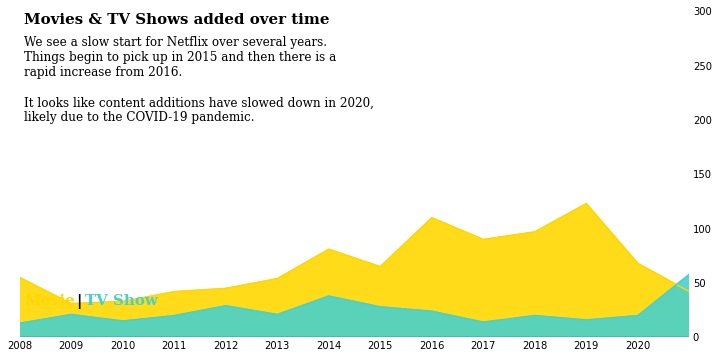

In [51]:
fig, ax = plt.subplots(1, 1, figsize=(12, 6))

for i, mtv in enumerate(df['type'].value_counts().index):
    mtv_rel = df[df['type']==mtv]['year_added_amazon'].value_counts().sort_index()
    ax.plot(mtv_rel.index, mtv_rel, color=colors[i], label=mtv)
    ax.fill_between(mtv_rel.index, 0, mtv_rel, color=colors[i], alpha=0.9)
    
ax.yaxis.tick_right()
    
ax.axhline(y = 0, color = 'black', linewidth = 1.3, alpha = .7)

ax.set_ylim(0, 300)
#ax.legend(loc='upper left')
for s in ['top', 'right','bottom','left']:
    ax.spines[s].set_visible(False)

ax.grid(False)

ax.set_xlim(2008,2021)
plt.xticks(np.arange(2008, 2021, 1))

fig.text(0.13, 0.85, 'Movies & TV Shows added over time', fontsize=15, fontweight='bold', fontfamily='serif')
fig.text(0.13, 0.59, 
'''We see a slow start for Netflix over several years. 
Things begin to pick up in 2015 and then there is a 
rapid increase from 2016.

It looks like content additions have slowed down in 2020, 
likely due to the COVID-19 pandemic.
'''

, fontsize=12, fontweight='light', fontfamily='serif')


fig.text(0.13,0.2,"Movie", fontweight="bold", fontfamily='serif', fontsize=15, color='gold')
fig.text(0.19,0.2,"|", fontweight="bold", fontfamily='serif', fontsize=15, color='black')
fig.text(0.2,0.2,"TV Show", fontweight="bold", fontfamily='serif', fontsize=15, color='mediumturquoise')

ax.tick_params(axis=u'both', which=u'both',length=0)

plt.show()

# Distribution Movie & TV Show added over month

In [52]:
df = data.copy()
df['date_added_netflix'].replace('no_data', np.nan, inplace  = True)
df = df.dropna(subset=['date_added_netflix'])
df['date_added_netflix'] = pd.to_datetime(df['date_added_netflix'])
df['month_added_netflix']=df['date_added_netflix'].dt.month
df['month_added_netflix']=df['date_added_netflix'].dt.month_name()
df['month_added_netflix']

month_order = ['January',
 'February',
 'March',
 'April',
 'May',
 'June',
 'July',
 'August',
 'September',
 'October',
 'November',
 'December']

df['month_name_added'] = pd.Categorical(df['month_added_netflix'], categories=month_order, ordered=True)

/var/folders/3g/t_1rwv_57vz466tvccx4d6gm0000gn/T/ipykernel_17932/2923628399.py:22: UserWarning:

FixedFormatter should only be used together with FixedLocator



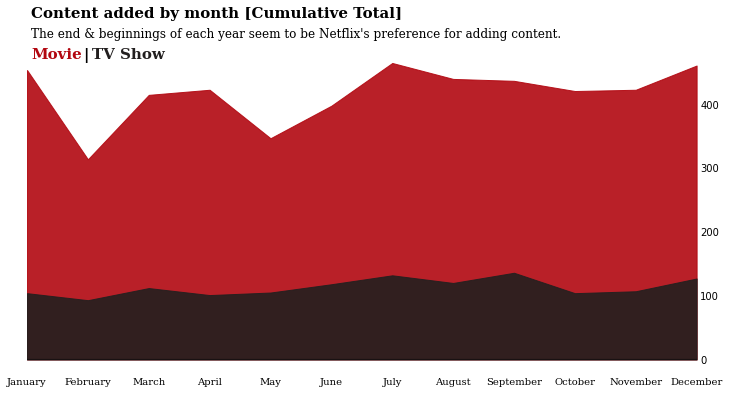

In [53]:
data_sub = df.groupby('type')['month_name_added'].value_counts().unstack().fillna(0).loc[['TV Show','Movie']].cumsum(axis=0).T

fig, ax = plt.subplots(1, 1, figsize=(12, 6))
color = ["#b20710", "#221f1f"]

for i, mtv in enumerate(df['type'].value_counts().index):
    mtv_rel = data_sub[mtv]
    ax.fill_between(mtv_rel.index, 0, mtv_rel, color=color[i], label=mtv,alpha=0.9)
    

    
ax.yaxis.tick_right()
    
ax.axhline(y = 0, color = 'black', linewidth = 1.3, alpha = .4)

#ax.set_ylim(0, 50)
#ax.legend(loc='upper left')
for s in ['top', 'right','bottom','left']:
    ax.spines[s].set_visible(False)

ax.grid(False)
ax.set_xticklabels(data_sub.index, fontfamily='serif', rotation=0)
ax.margins(x=0) # remove white spaces next to margins

#ax.set_xlim(2008,2020)
#plt.xticks(np.arange(2008, 2021, 1))

fig.text(0.13, 0.95, 'Content added by month [Cumulative Total]', fontsize=15, fontweight='bold', fontfamily='serif')
fig.text(0.13, 0.905, 
"The end & beginnings of each year seem to be Netflix's preference for adding content."

, fontsize=12, fontweight='light', fontfamily='serif')



fig.text(0.13,0.855,"Movie", fontweight="bold", fontfamily='serif', fontsize=15, color='#b20710')
fig.text(0.19,0.855,"|", fontweight="bold", fontfamily='serif', fontsize=15, color='black')
fig.text(0.2,0.855,"TV Show", fontweight="bold", fontfamily='serif', fontsize=15, color='#221f1f')


ax.tick_params(axis=u'both', which=u'both',length=0)

plt.show()

In [54]:
df = data.copy()
df['date_added_amazon'].replace('no_data', np.nan, inplace  = True)
df = df.dropna(subset=['date_added_amazon'])
df['date_added_amazon'] = pd.to_datetime(df['date_added_amazon'])
df['month_added_amazon']=df['date_added_amazon'].dt.month
df['month_added_amazon']=df['date_added_amazon'].dt.month_name()
df['month_added_amazon']

month_order = ['January',
 'February',
 'March',
 'April',
 'May',
 'June',
 'July',
 'August',
 'September',
 'October',
 'November',
 'December']

df['month_name_added'] = pd.Categorical(df['month_added_amazon'], categories=month_order, ordered=True)

In [55]:
df[['month_name_added', 'type']]

,month_name_added,type
17,August,Movie
50,September,Movie
55,August,Movie
92,October,Movie
106,August,TV Show
...,...,...
8295,August,Movie
8297,July,TV Show
8300,December,Movie
8309,March,Movie


/var/folders/3g/t_1rwv_57vz466tvccx4d6gm0000gn/T/ipykernel_17932/2923628399.py:22: UserWarning:

FixedFormatter should only be used together with FixedLocator



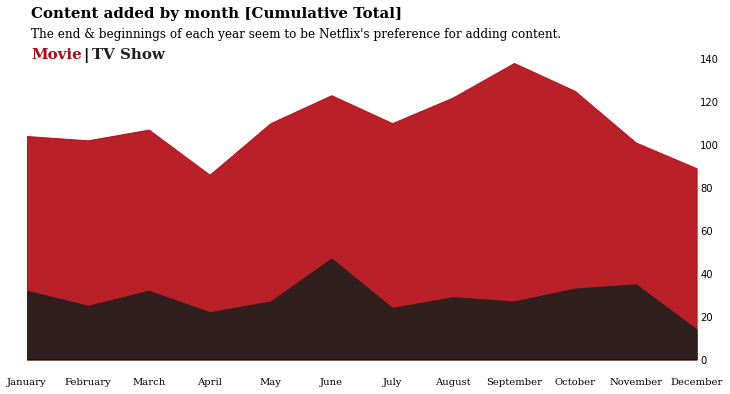

In [56]:
data_sub = df.groupby('type')['month_name_added'].value_counts().unstack().fillna(0).loc[['TV Show','Movie']].cumsum(axis=0).T

fig, ax = plt.subplots(1, 1, figsize=(12, 6))
color = ["#b20710", "#221f1f"]

for i, mtv in enumerate(df['type'].value_counts().index):
    mtv_rel = data_sub[mtv]
    ax.fill_between(mtv_rel.index, 0, mtv_rel, color=color[i], label=mtv,alpha=0.9)
    

    
ax.yaxis.tick_right()
    
ax.axhline(y = 0, color = 'black', linewidth = 1.3, alpha = .4)

#ax.set_ylim(0, 50)
#ax.legend(loc='upper left')
for s in ['top', 'right','bottom','left']:
    ax.spines[s].set_visible(False)

ax.grid(False)
ax.set_xticklabels(data_sub.index, fontfamily='serif', rotation=0)
ax.margins(x=0) # remove white spaces next to margins

#ax.set_xlim(2008,2020)
#plt.xticks(np.arange(2008, 2021, 1))

fig.text(0.13, 0.95, 'Content added by month [Cumulative Total]', fontsize=15, fontweight='bold', fontfamily='serif')
fig.text(0.13, 0.905, 
"The end & beginnings of each year seem to be Netflix's preference for adding content."

, fontsize=12, fontweight='light', fontfamily='serif')



fig.text(0.13,0.855,"Movie", fontweight="bold", fontfamily='serif', fontsize=15, color='#b20710')
fig.text(0.19,0.855,"|", fontweight="bold", fontfamily='serif', fontsize=15, color='black')
fig.text(0.2,0.855,"TV Show", fontweight="bold", fontfamily='serif', fontsize=15, color='#221f1f')


ax.tick_params(axis=u'both', which=u'both',length=0)

plt.show()

# Genre over month 

In [57]:
df = data.copy()
df['date_added_amazon'].replace('no_data', np.nan, inplace  = True)
df = df.dropna(subset=['date_added_amazon'])
df['date_added_amazon'] = pd.to_datetime(df['date_added_amazon'])
df['month_added_amazon']=df['date_added_amazon'].dt.month
df['month_added_amazon']=df['date_added_amazon'].dt.month_name()
df['month_added_amazon']

month_order = ['January',
 'February',
 'March',
 'April',
 'May',
 'June',
 'July',
 'August',
 'September',
 'October',
 'November',
 'December']

df['month_name_added'] = pd.Categorical(df['month_added_amazon'], categories=month_order, ordered=True)
df['genre'] = df['listed_in'].apply(lambda x :  x.replace(' ,',',').replace(', ',',').split(',')) 
df[['month_name_added', 'genre', 'count']]

,month_name_added,genre,count
17,August,[Thriller],1
50,September,[Drama],1
55,August,"[Drama, International, Thriller]",1
92,October,"[Drama, Faith & spirituality]",1
106,August,"[Kids' tv, Commedy]",1
...,...,...,...
8295,August,"[Art, Entertainment, Art, Comedy]",1
8297,July,"[Action & adventure, Romance]",1
8300,December,"[Comedy, Drama, Children & family movie]",1
8309,March,[Action & adventure],1


In [58]:
df_new = pd.DataFrame()

for index, i in df['genre'].iteritems(): 
    for n in range(len(i)):
        w = i[n]
        df_new.loc[index, 'genre'] = w
        df_new.loc[index, 'month_name_added'] = df._get_value(index, 'month_name_added')
        df_new.loc[index, 'count'] = df._get_value(index, 'count')

df_new

,genre,month_name_added,count
17,Thriller,August,1.0
50,Drama,September,1.0
55,Thriller,August,1.0
92,Faith & spirituality,October,1.0
106,Commedy,August,1.0
...,...,...,...
8295,Comedy,August,1.0
8297,Romance,July,1.0
8300,Children & family movie,December,1.0
8309,Action & adventure,March,1.0


In [59]:
d = df_new.groupby(['month_name_added', 'genre']).size().sort_values(ascending=False).reset_index(name='count').drop_duplicates(subset='genre')
d

,month_name_added,genre,count
0,September,Drama,36
1,August,Thriller,32
16,January,Comedy,18
26,May,International,14
27,December,Romance,13
32,June,Children & family movie,10
40,October,Sci-fi & fantasy,9
45,June,Tv show,8
53,October,Horror,7
59,October,Sport,6


In [60]:
fig = px.histogram(d, x="month_name_added", y="count", color='genre', category_orders=dict(day=month_order))
fig.show()

# Genere Correlation

In [61]:
import plotly.express as px

df = px.data.medals_wide(indexed=True)
print(df)
# fig = px.imshow(df)
# fig.show()

medal        gold  silver  bronze
nation                           
South Korea    24      13      11
China          10      15       8
Canada          9      12      12


In [62]:
df = data.copy()
df['listed_in'].replace('no_data', np.nan, inplace  = True)
df = df.dropna(subset=['listed_in'])

df_amazon = df.query("amazon == 1.0")
df_netflix = df.query("netflix == 1.0")

/var/folders/3g/t_1rwv_57vz466tvccx4d6gm0000gn/T/ipykernel_17932/4058009853.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/3g/t_1rwv_57vz466tvccx4d6gm0000gn/T/ipykernel_17932/4058009853.py:15: DeprecationWarning:

`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



There are 27 types in the Movie Dataset


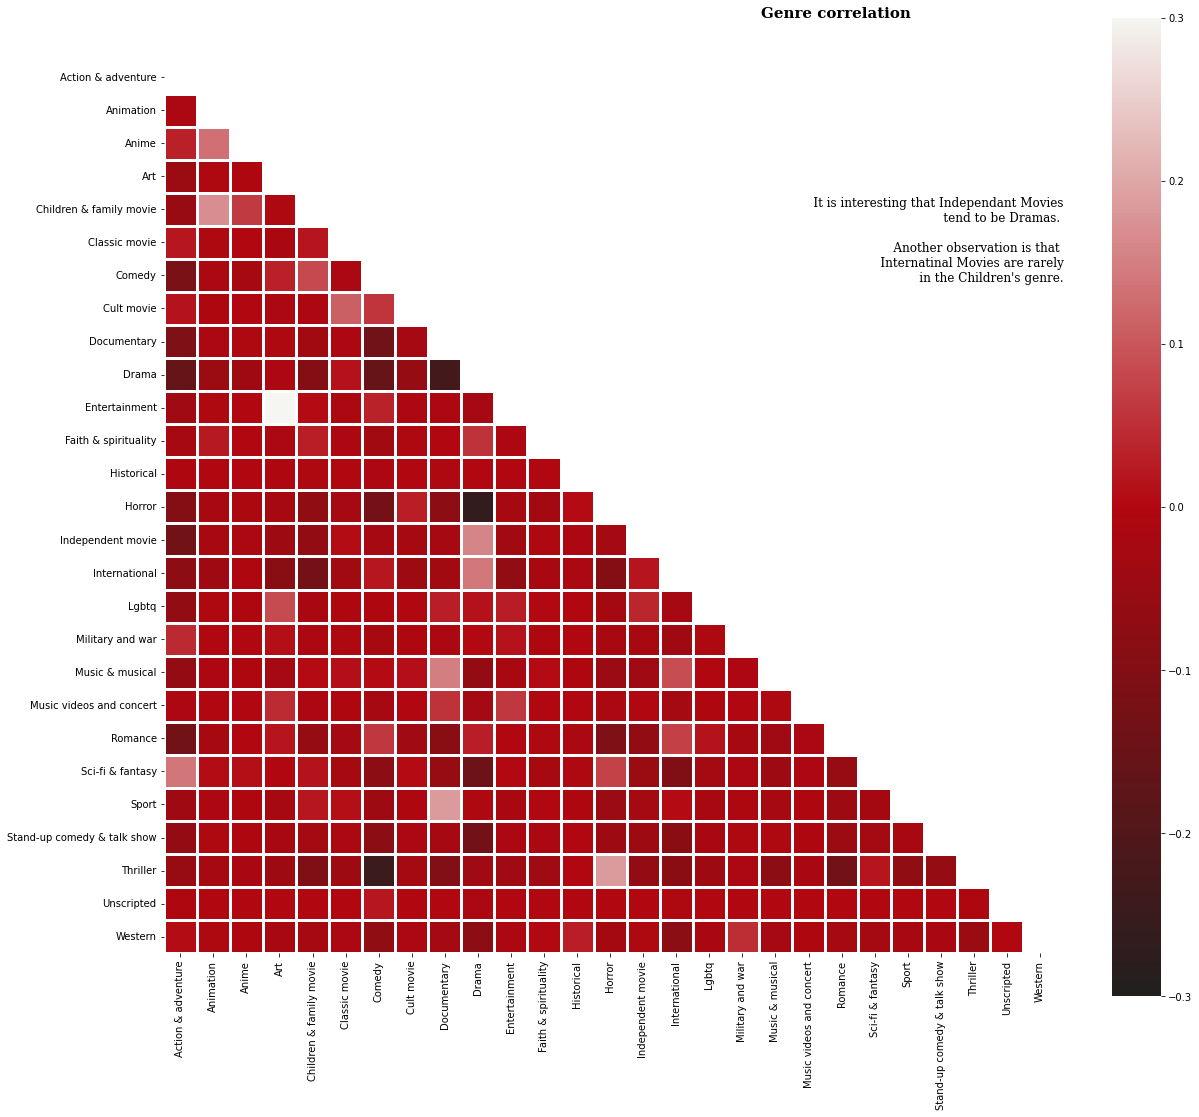

In [63]:
# Custom colour map based on Netflix palette
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ['#221f1f', '#b20710','#f5f5f1'])


def genre_heatmap(df, title):
    df['genre'] = df['listed_in'].apply(lambda x :  x.replace(' ,',',').replace(', ',',').split(',')) 
    Types = []
    for i in df['genre']: Types += i
    Types = set(Types)
    print("There are {} types in the {} Dataset".format(len(Types),title))    
    test = df['genre']
    mlb = MultiLabelBinarizer()
    res = pd.DataFrame(mlb.fit_transform(test), columns=mlb.classes_, index=test.index)
    corr = res.corr()
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True
    fig, ax = plt.subplots(figsize=(20, 18))
    fig.text(.54,.88,'Genre correlation', fontfamily='serif',fontweight='bold',fontsize=15)
    fig.text(.75,.665,
            '''
             It is interesting that Independant Movies
             tend to be Dramas. 
             
             Another observation is that 
             Internatinal Movies are rarely
             in the Children's genre.
             ''', fontfamily='serif',fontsize=12,ha='right')
    pl = sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, vmin=-.3, center=0, square=True, linewidths=2.5)
    
    plt.show()
    
df_show = df.copy()

df_tv = df_show[df_show["type"] == "TV Show"]
df_movies = df_show[df_show["type"] == "Movie"]


genre_heatmap(df_movies, 'Movie')

/var/folders/3g/t_1rwv_57vz466tvccx4d6gm0000gn/T/ipykernel_17932/634533050.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/3g/t_1rwv_57vz466tvccx4d6gm0000gn/T/ipykernel_17932/634533050.py:15: DeprecationWarning:

`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



There are 27 types in the Netflix Movie Dataset


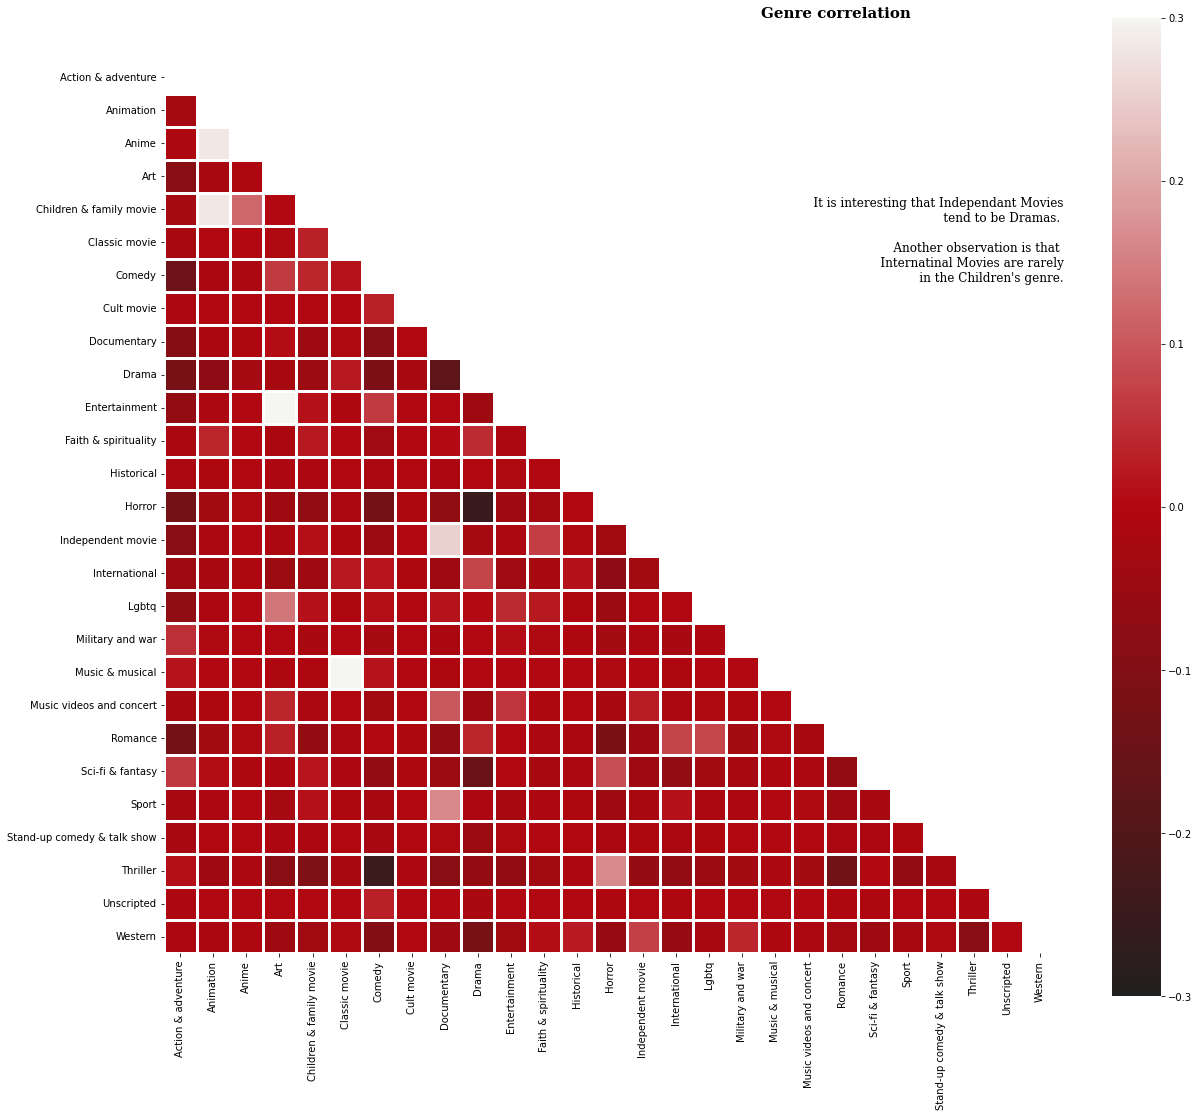

In [64]:
# Custom colour map based on Netflix palette
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ['#221f1f', '#b20710','#f5f5f1'])


def genre_heatmap(df, title):
    df['genre'] = df['listed_in'].apply(lambda x :  x.replace(' ,',',').replace(', ',',').split(',')) 
    Types = []
    for i in df['genre']: Types += i
    Types = set(Types)
    print("There are {} types in the Netflix {} Dataset".format(len(Types),title))    
    test = df['genre']
    mlb = MultiLabelBinarizer()
    res = pd.DataFrame(mlb.fit_transform(test), columns=mlb.classes_, index=test.index)
    corr = res.corr()
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True
    fig, ax = plt.subplots(figsize=(20, 18))
    fig.text(.54,.88,'Genre correlation', fontfamily='serif',fontweight='bold',fontsize=15)
    fig.text(.75,.665,
            '''
             It is interesting that Independant Movies
             tend to be Dramas. 
             
             Another observation is that 
             Internatinal Movies are rarely
             in the Children's genre.
             ''', fontfamily='serif',fontsize=12,ha='right')
    pl = sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, vmin=-.3, center=0, square=True, linewidths=2.5)
    
    plt.show()

df_tv = df[df["type"] == "TV Show"]
df_movies = df_amazon[df_amazon["type"] == "Movie"]


genre_heatmap(df_movies, 'Movie')
plt.show()

/var/folders/3g/t_1rwv_57vz466tvccx4d6gm0000gn/T/ipykernel_17932/634533050.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/3g/t_1rwv_57vz466tvccx4d6gm0000gn/T/ipykernel_17932/634533050.py:15: DeprecationWarning:

`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



There are 19 types in the Netflix Movie Dataset


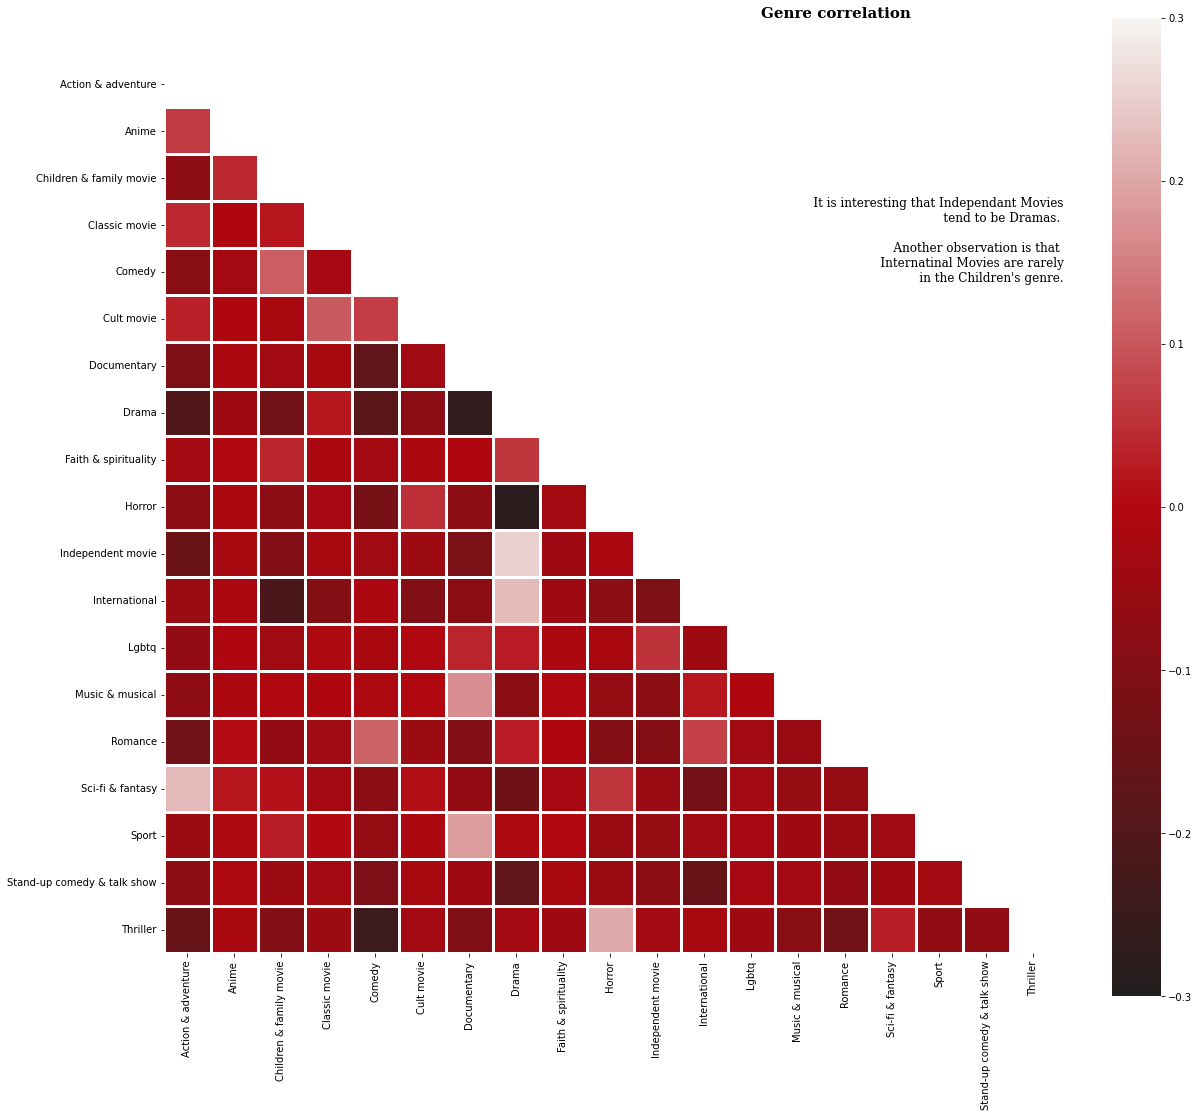

In [65]:
df_movies = df_netflix[df_netflix["type"] == "Movie"]


genre_heatmap(df_movies, 'Movie')
plt.show()

# How Old movies?

In [70]:
df = data.copy()
df['country'].replace('no_data', np.nan, inplace  = True)
df = df.dropna(subset=['country'])
df['date_added_netflix'].replace('no_data', np.nan, inplace  = True)
df = df.dropna(subset=['date_added_netflix'])
df['date_added_netflix'] = pd.to_datetime(df['date_added_netflix'])
df['year_added_netflix'] = df['date_added_netflix'].dt.year
df_tv = df[df["type"] == "TV Show"]
df_movies = df[df["type"] == "Movie"]
df = df_movies.groupby('first_country')[['first_country','count']].sum().sort_values(by='count',ascending=False).reset_index()[:10]
df

,first_country,count
0,USA,1512
1,India,696
2,UK,236
3,Canada,107
4,France,95
5,Nigeria,77
6,Spain,72
7,Hong Kong,61
8,Philippines,59
9,Germany,51


/var/folders/3g/t_1rwv_57vz466tvccx4d6gm0000gn/T/ipykernel_17932/1689595061.py:5: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



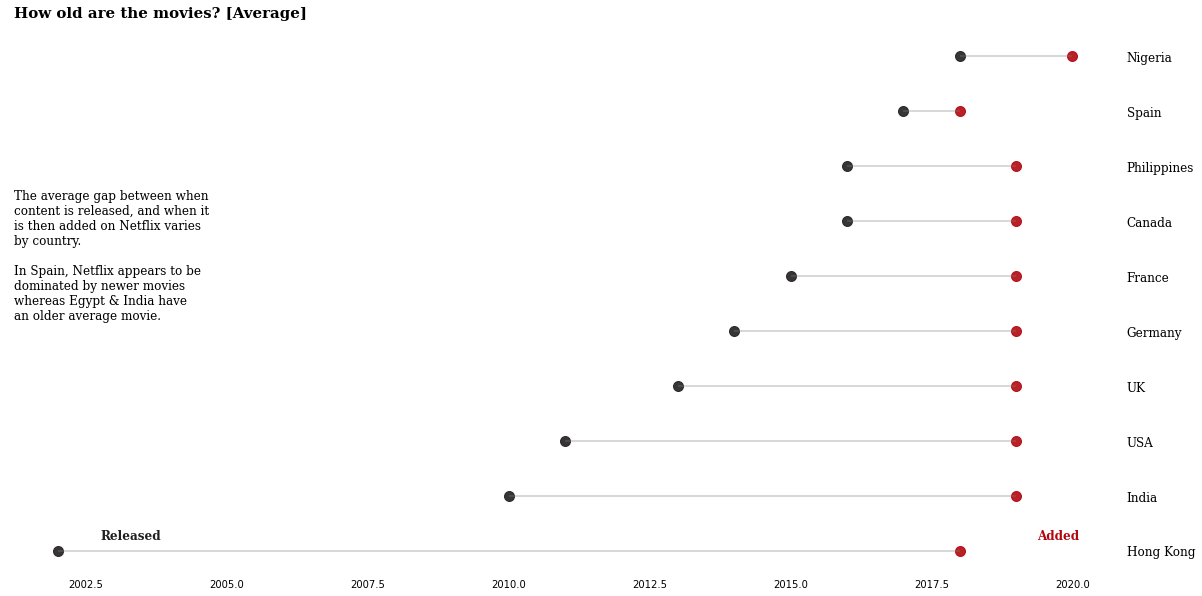

In [78]:
df = df_movies.groupby('first_country')[['first_country','count']].sum().sort_values(by='count',ascending=False).reset_index()[:10]
df = df['first_country']
df_loli = df_movies.loc[df_movies['first_country'].isin(df)]

loli = df_loli.groupby('first_country')['release_year','year_added_netflix'].mean().round()


# Reorder it following the values of the first value
ordered_df = loli.sort_values(by='release_year')

ordered_df_rev = loli.sort_values(by='release_year',ascending=False)

my_range=range(1,len(loli.index)+1)


fig, ax = plt.subplots(1, 1, figsize=(20, 10))

fig.text(0.13, 0.9, 'How old are the movies? [Average]', fontsize=15, fontweight='bold', fontfamily='serif')
plt.hlines(y=my_range, xmin=ordered_df['release_year'], xmax=ordered_df['year_added_netflix'], color='grey', alpha=0.4)
plt.scatter(ordered_df['release_year'], my_range, color='#221f1f',s=100, alpha=0.9, label='Average release date')
plt.scatter(ordered_df['year_added_netflix'], my_range, color='#b20710',s=100, alpha=0.9 , label='Average added date')
#plt.legend()

for s in ['top', 'left', 'right', 'bottom']:
    ax.spines[s].set_visible(False)
    

# Removes the tick marks but keeps the labels
ax.tick_params(axis=u'both', which=u'both',length=0)
# Move Y axis to the right side
ax.yaxis.tick_right()

plt.yticks(my_range, ordered_df.index)
plt.yticks(fontname = "serif",fontsize=12)

# Custome legend
fig.text(0.19,0.175,"Released", fontweight="bold", fontfamily='serif', fontsize=12, color='#221f1f')
fig.text(0.84,0.175,"Added", fontweight="bold", fontfamily='serif', fontsize=12, color='#b20710')


fig.text(0.13, 0.46, 
'''The average gap between when 
content is released, and when it
is then added on Netflix varies
by country. 

In Spain, Netflix appears to be 
dominated by newer movies 
whereas Egypt & India have
an older average movie.
'''
, fontsize=12, fontweight='light', fontfamily='serif')


#plt.xlabel('Year')
#plt.ylabel('Country')
plt.show()

In [79]:
df = data.copy()
df['country'].replace('no_data', np.nan, inplace  = True)
df = df.dropna(subset=['country'])
df['date_added_amazon'].replace('no_data', np.nan, inplace  = True)
df = df.dropna(subset=['date_added_netflix'])
df['date_added_amazon'] = pd.to_datetime(df['date_added_amazon'])
df['year_added_amazon'] = df['date_added_amazon'].dt.year
df_tv = df[df["type"] == "TV Show"]
df_movies = df[df["type"] == "Movie"]
df = df_movies.groupby('first_country')[['first_country','count']].sum().sort_values(by='count',ascending=False).reset_index()[:10]
df

,first_country,count
0,USA,2449
1,India,1118
2,UK,346
3,Canada,178
4,France,122
5,Hong Kong,88
6,Spain,86
7,Nigeria,78
8,Germany,68
9,Australia,65


/var/folders/3g/t_1rwv_57vz466tvccx4d6gm0000gn/T/ipykernel_17932/4177974716.py:5: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



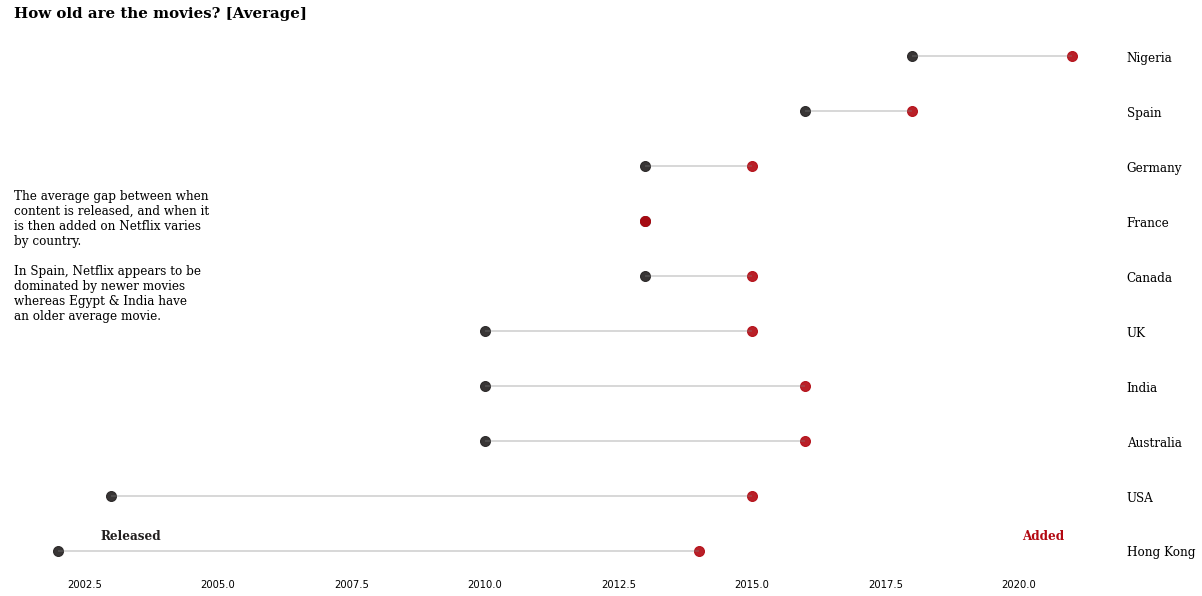

In [80]:
df = df_movies.groupby('first_country')[['first_country','count']].sum().sort_values(by='count',ascending=False).reset_index()[:10]
df = df['first_country']
df_loli = df_movies.loc[df_movies['first_country'].isin(df)]

loli = df_loli.groupby('first_country')['release_year','year_added_amazon'].mean().round()


# Reorder it following the values of the first value
ordered_df = loli.sort_values(by='release_year')

ordered_df_rev = loli.sort_values(by='release_year',ascending=False)

my_range=range(1,len(loli.index)+1)


fig, ax = plt.subplots(1, 1, figsize=(20, 10))

fig.text(0.13, 0.9, 'How old are the movies? [Average]', fontsize=15, fontweight='bold', fontfamily='serif')
plt.hlines(y=my_range, xmin=ordered_df['release_year'], xmax=ordered_df['year_added_amazon'], color='grey', alpha=0.4)
plt.scatter(ordered_df['release_year'], my_range, color='#221f1f',s=100, alpha=0.9, label='Average release date')
plt.scatter(ordered_df['year_added_amazon'], my_range, color='#b20710',s=100, alpha=0.9 , label='Average added date')
#plt.legend()

for s in ['top', 'left', 'right', 'bottom']:
    ax.spines[s].set_visible(False)
    

# Removes the tick marks but keeps the labels
ax.tick_params(axis=u'both', which=u'both',length=0)
# Move Y axis to the right side
ax.yaxis.tick_right()

plt.yticks(my_range, ordered_df.index)
plt.yticks(fontname = "serif",fontsize=12)

# Custome legend
fig.text(0.19,0.175,"Released", fontweight="bold", fontfamily='serif', fontsize=12, color='#221f1f')
fig.text(0.83,0.175,"Added", fontweight="bold", fontfamily='serif', fontsize=12, color='#b20710')


fig.text(0.13, 0.46, 
'''The average gap between when 
content is released, and when it
is then added on Netflix varies
by country. 

In Spain, Netflix appears to be 
dominated by newer movies 
whereas Egypt & India have
an older average movie.
'''
, fontsize=12, fontweight='light', fontfamily='serif')


#plt.xlabel('Year')
#plt.ylabel('Country')
plt.show()

# Distributors distribution